In [1]:
import pandas as pd
import geopandas as gpd
import networkx as nx 
import osmnx as ox

from geopy.distance import great_circle

pd.set_option('display.max_columns', None)

In [2]:
G_road = nx.read_gpickle('../Roads/data/BTS_florida_G.plk')

G_rail = nx.read_gpickle('../Rail/rail_data/simplified_rail_net_florida.plk')

In [3]:
road_nodes,road_edges = ox.graph_to_gdfs(G_road)

rail_nodes,rail_edges = ox.graph_to_gdfs(G_rail)

In [4]:
road_edges.head(2)

,OBJECTID,YEAR_RECOR,ROUTE_ID,BEGIN_POIN,END_POINT,F_SYSTEM,FACILITY_T,URBAN_CODE,RECTYPE,VERSION,RECID,ORIGID,CTFIPS,SOURCE,LGURB,SMURB,SIGN1,SIGNT1,SIGNN1,SIGN2,SIGNT2,SIGNN2,SIGN3,SIGNT3,SIGNN3,MILES,KM,FCLASS,RUCODE,STATUS,NHS,STRAHNET,CONN_MILES,LRSKEY,LRSSEQ,BEGMP,ENDMP,STFIPS,ShapeSTLen,maxspeed,maxspeed_kmh,duration,length,CO2_eq_kg,geometry,SIGNQ1,LNAME,SIGNQ3,FAC_ID,CONN_DES,SIGNQ2,CONN_ID,u,v,key
0,79830,2010,54020000,10.017,16.373,3,2,99999,L,2014.05,12002476,1200004384,65,H,0,0,U19,U,19,U27,U,27,S20,S,20,6.145,9.889,2,1,1,7,0,0,005402000000065,4,10.029,16.421,12,11789.6,70 mph,112.65408,0.087782,9889.0,0.796193,"LINESTRING (-83.91130 30.41100, -83.81390 30.3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000002,1000012550,0
1,"[124328, 124322]",2010,54030000,"[0.0, 4.509]","[4.509, 4.754]",3,2,99999,L,2014.05,"[12003410, 12003414]","[1200004817, 1200004814]",65,H,0,0,U19,U,19,S57,S,57,NaN,NaN,NaN,"[0.251, 4.643]","[0.404, 7.473]",2,1,1,7,0,0,005403000000065,"[1, 2]","[0.0, 4.487]","[4.487, 4.74]",12,"[8424.27453764536, 456.38101204167475]",70 mph,112.65408,"[0.06633581313699423, 0.0035861994523411845]",7877.0,"[0.601673649, 0.032527252]","LINESTRING (-83.91130 30.41100, -83.89120 30.4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000002,1000000003,0


In [5]:
road_nodes.head()

,nodes_pos,tag,x,y,osmid,geometry
1000000002,"(-83.9113, 30.411)",road,-83.9113,30.4110,"(-83.9113, 30.411)",POINT (-83.91130 30.41100)
1000000003,"(-83.8897, 30.4754)",road,-83.8897,30.4754,"(-83.8897, 30.4754)",POINT (-83.88970 30.47540)
1000000004,"(-83.9208, 30.4784)",road,-83.9208,30.4784,"(-83.9208, 30.4784)",POINT (-83.92080 30.47840)
1000000011,"(-87.8656, 30.4213)",road,-87.8656,30.4213,"(-87.8656, 30.4213)",POINT (-87.86560 30.42130)
1000000020,"(-87.8919, 30.5526)",road,-87.8919,30.5526,"(-87.8919, 30.5526)",POINT (-87.89190 30.55260)


In [6]:
road_nodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2477 entries, 1000000002 to 1000015177
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   nodes_pos  2477 non-null   object  
 1   tag        2477 non-null   object  
 2   x          2477 non-null   float64 
 3   y          2477 non-null   float64 
 4   osmid      2477 non-null   object  
 5   geometry   2477 non-null   geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 135.5+ KB


In [7]:
rail_nodes.head()

,OBJECTID,FRANODEID,COUNTRY,STATE,STFIPS,CTYFIPS,STCYFIPS,FRAREGION,BNDRY,geometry,x,y
416132,144561,416132,US,AL,01,053,01053,3,1,POINT (-87.49830 30.99790),-87.4983,30.9979
88,144573,88,US,AL,01,053,01053,3,0,POINT (-87.49700 31.02550),-87.4970,31.0255
416709,145138,416709,US,AL,01,003,01003,3,1,POINT (-87.43640 30.68880),-87.4364,30.6888
416975,145406,416975,US,AL,01,003,01003,3,1,POINT (-87.39730 30.60890),-87.3973,30.6089
417889,146320,417889,US,FL,12,033,12033,3,0,POINT (-87.32360 30.78890),-87.3236,30.7889


In [14]:
rail_edges.head(3)

,OBJECTID,FRAARCID,STFIPS,CNTYFIPS,STCNTYFIPS,STATEAB,COUNTRY,FRAREGION,RROWNER1,TRACKS,DIRECTION,NET,TIMEZONE,length,speed,duration_h,CO2_eq_kg,geometry,STRACNET,IM_RT_TYPE,DS,TRKRGHTS1,PASSNGR,TRKRGHTS2,TRKRGHTS3,u,v,key
0,178376,476815,01,053,01053,AL,US,3,AGR,1,2.0,M,C,3085.42343,16,1.73715,4.18292e-08,"LINESTRING (-87.49830 30.99790, -87.49700 31.0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,416132,88,0
1,"[178170, 178171, 178173, 178166]","[476609, 476610, 476612, 476605]",12,033,12033,FL,US,3,AGR,1,2.0,M,C,37397.95557,16,"[13.618810569338812, 0.664038166863922, 3.5390...","[4.254603582249088e-06, 2.0744977317255728e-07...","LINESTRING (-87.43640 30.68880, -87.50610 30.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,416132,416709,0
2,176514,474953,01,003,01003,AL,US,3,AGR,1,2.0,M,C,9961.40725,16,5.78412,1.807e-06,"LINESTRING (-87.43640 30.68880, -87.39730 30.6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,416709,416975,0


In [12]:
def get_closest_road_rail_nodes(road_nodes,rail_nodes):
    
    intermodal_rail_nodes = rail_nodes[rail_nodes.index < 190]

    df = pd.DataFrame(index = intermodal_rail_nodes.index,columns=['road_idx','dist'])
    
    for row in intermodal_rail_nodes.itertuples():
        dist = pd.eval('(road_nodes.x-row.x)**2 + (road_nodes.y-row.y)**2')
        df.loc[row.Index,'road_idx'] = dist.idxmin()
        df.loc[row.Index,'dist'] = great_circle((row.x,row.y),(road_nodes.loc[dist.idxmin(),'x'],road_nodes.loc[dist.idxmin(),'y'])).km * 1000
    return df

get_closest_road_rail_nodes(road_nodes,rail_nodes)

,road_idx,dist
88,1000014898,865.138
111,1000014921,1666.48
131,1000014933,4372.02
175,1000015121,511.322
45,1000015110,2476.96
170,1000014980,126.96
171,1000015133,1616.61
84,1000013829,472.642
85,1000014153,158.671
153,1000014801,2245.39


In [10]:
intermodal_links = pd.DataFrame(index = range(len(df)),columns=road_edges.columns)
i = 0
for row in df.itertuples():
    intermodal_links.loc[i,'u'] = row.road_idx
    intermodal_links.loc[i,'v'] = row.Index
    intermodal_links.loc[i,'length'] = row.dist
    intermodal_links.loc[i,'maxspeed_kmh'] = 10 #DEFAULT
    intermodal_links.loc[i,'duration'] = 2 #Hours DEFAULT
    intermodal_links.loc[i,'key'] = 0
    i+=1

In [11]:
intermodal_links

,OBJECTID,YEAR_RECOR,ROUTE_ID,BEGIN_POIN,END_POINT,F_SYSTEM,FACILITY_T,URBAN_CODE,RECTYPE,VERSION,RECID,ORIGID,CTFIPS,SOURCE,LGURB,SMURB,SIGN1,SIGNT1,SIGNN1,SIGN2,SIGNT2,SIGNN2,SIGN3,SIGNT3,SIGNN3,MILES,KM,FCLASS,RUCODE,STATUS,NHS,STRAHNET,CONN_MILES,LRSKEY,LRSSEQ,BEGMP,ENDMP,STFIPS,ShapeSTLen,maxspeed,maxspeed_kmh,duration,length,CO2_eq_kg,geometry,SIGNQ1,LNAME,SIGNQ3,FAC_ID,CONN_DES,SIGNQ2,CONN_ID,u,v,key
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2,865.138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000014898,88,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2,1666.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000014921,111,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2,4372.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000014933,131,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2,511.322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000015121,175,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2,2476.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000015110,45,0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2,126.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000014980,170,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2,1616.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000015133,171,0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2,472.642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000013829,84,0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2,158.671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000014153,85,0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2,2245.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000014801,153,0


In [12]:
road_edges = road_edges.append(intermodal_links,ignore_index=True)

In [13]:
intermodal_nodes = pd.DataFrame(index = df.index,columns=road_nodes.columns)
i = 0
for row in df.itertuples():
    intermodal_nodes.loc[row.Index,'tag'] = row.road_idx
    intermodal_nodes.loc[row.Index,'x'] = rail_nodes.loc[row.Index,'x']
    intermodal_nodes.loc[row.Index,'y'] = rail_nodes.loc[row.Index,'y']
    intermodal_nodes.loc[row.Index,'geometry'] = rail_nodes.loc[row.Index,'geometry']
    intermodal_nodes.loc[row.Index,'STCYFIPS'] = rail_nodes.loc[row.Index,'STCYFIPS']
    i+=1

In [14]:
intermodal_nodes

,nodes_pos,tag,x,y,osmid,geometry,STCYFIPS
88,NaN,1000014898,-87.497,31.0255,NaN,POINT (-87.497 31.0255),01053
111,NaN,1000014921,-85.393,31.0364,NaN,POINT (-85.393 31.0364),01069
131,NaN,1000014933,-84.6651,31.0682,NaN,POINT (-84.6651 31.0682),13201
175,NaN,1000015121,-83.3872,31.0295,NaN,POINT (-83.38720000000001 31.0295),13075
45,NaN,1000015110,-82.7826,31.0222,NaN,POINT (-82.7826 31.0222),13065
170,NaN,1000014980,-82.3816,27.9613,NaN,POINT (-82.38160000000001 27.9613),12057
171,NaN,1000015133,-82.0153,31.065,NaN,POINT (-82.0153 31.065),13049
84,NaN,1000013829,-81.7689,30.3854,NaN,POINT (-81.7689 30.3854),12031
85,NaN,1000014153,-81.732,30.3696,NaN,POINT (-81.732 30.3696),12031
153,NaN,1000014801,-81.707,30.8776,NaN,POINT (-81.70699999999999 30.8776),13039


In [15]:
road_nodes  = road_nodes.append(intermodal_nodes)

In [16]:
G_road_w_link = ox.graph_from_gdfs(road_nodes, road_edges)

In [17]:
multimodal_net = nx.compose(G_road_w_link,G_rail)

Text(0.5, 1.0, 'connected components size')

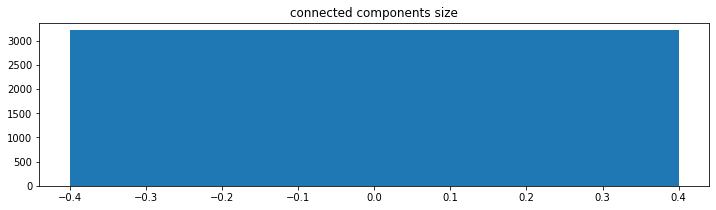

In [19]:
import matplotlib.pyplot as plt
multimodal_net_u = multimodal_net.to_undirected()

component_size = sorted([len(component) for component in nx.connected_components(multimodal_net_u)], reverse=True)
fig, ax = plt.subplots(figsize=(12,3))
plt.bar(range(len(component_size)),component_size)
plt.plot(range(len(component_size)),component_size,color='red',alpha=0.5)
plt.title('connected components size')

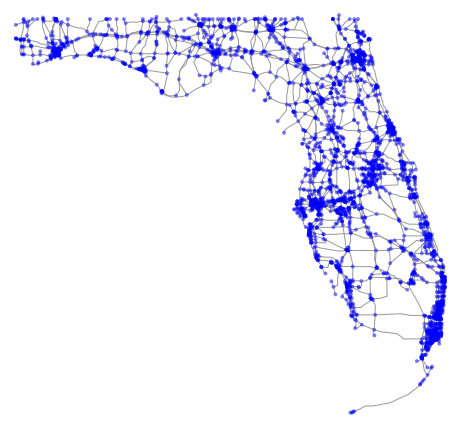

In [20]:
fig, ax = ox.plot_graph(multimodal_net_u,node_color='blue',bgcolor='white',node_alpha=0.5)

In [16]:
a = pd.DataFrame({'a':[1,2,3,4],'b':[11,11,11,11]})

In [17]:
a

,a,b
0,1,11
1,2,11
2,3,11
3,4,11


In [18]:
b = pd.DataFrame(index =[300,400,500,600],columns=['a','b'])
b['a'] = [1,2,3,4]
b['b'] = [32,1,23,3]

In [19]:
b

,a,b
300,1,32
400,2,1
500,3,23
600,4,3


In [20]:
a.append(b,ignore_index=True)

,a,b
0,1,11
1,2,11
2,3,11
3,4,11
4,1,32
5,2,1
6,3,23
7,4,3


In [21]:
a.append(b)

,a,b
0,1,11
1,2,11
2,3,11
3,4,11
300,1,32
400,2,1
500,3,23
600,4,3
